# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as r 
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#numOfCities = len(cities)
url_List = []
query_base = url  + "appid=" + weather_api_key + "&q="
for city in cities:
    cityName = str(city)
    query_url = query_base + cityName
    url_endpoint = (query_url)
    url_List.append(url_endpoint)


In [6]:
cityData_list = []
for apiCall in url_List:
    x = str(apiCall).replace(" ", "%20")
    c = r.get(x)
    cstatus = c.status_code
    
    if 200 <= cstatus <= 300:
        cityData_list.append(c.json())
    f = len(cityData_list)

    if f%60 == 0:
        #print("Resting")
        time.sleep(60)
        

Resting
Resting
Resting
Resting
Resting
Resting
Resting
Resting
Resting


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
cId = []
cName = []
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
recordDate = []
for entry in cityData_list:
   cId.append(entry['id'])
   cName.append(entry['name'])
   lat.append(entry['coord']['lat'])
   lng.append(entry['coord']['lon'])
   maxTemp.append(entry['main']['temp_max'])
   humidity.append(entry['main']['humidity'])
   cloudiness.append(entry['clouds']['all'])
   windSpeed.append(entry['wind']['speed'])
   recordDate.append(entry['dt'])

   print(entry['id'])
   print(entry['name'])

In [9]:
weather_dict = {
    "City Id":cId,
    "City":cName,
    "Lat":lat,
    "Lon":lng,
    "Max Temp":maxTemp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windSpeed,
    "Date":recordDate
}

In [15]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City Id,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,3628473,San Cristobal,7.7669,-72.2250,300.25,47,26,3.05,1653079425
1,3652764,Puerto Ayora,-0.7393,-90.3518,300.13,91,53,0.89,1653079425
2,2181625,Te Anau,-45.4167,167.7167,278.98,88,100,2.26,1653079426
3,3424607,Tasiilaq,65.6145,-37.6368,276.24,73,17,2.27,1653079282
4,162627,Yabrūd,33.9674,36.6574,289.31,36,0,2.87,1653079426


In [16]:
weather_data.to_csv('weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
weather_data.describe()

,City Id,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as r 
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.read_csv('weather_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

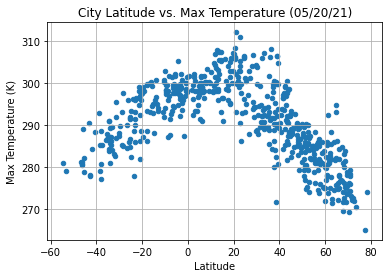

In [24]:
latTempPlot = clean_city_data.plot(kind='scatter', x= 'Lat', y = 'Max Temp', title = 'City Latitude vs. Max Temperature (05/20/21)', xlabel = 'Latitude', ylabel = "Max Temperature (K)", grid = 1 );


Code is plotting Max temp at latitudes. As latitude moves closer to 0, max Temp rises

## Latitude vs. Humidity Plot

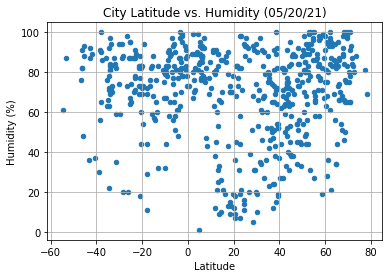

In [25]:
latHumidityPlot = clean_city_data.plot(kind='scatter', x= 'Lat', y = 'Humidity', title = 'City Latitude vs. Humidity (05/20/21)', xlabel = 'Latitude', ylabel = "Humidity (%)", grid = 1 );


Code is plotting humidity at latitudes. Humidity can be low or high regardless of latitude; however low humidity is less likely to occur as latitude moves towards zero

## Latitude vs. Cloudiness Plot

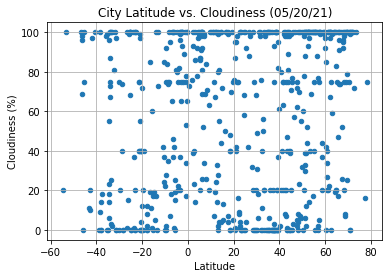

In [26]:
latCloudinessPlot = clean_city_data.plot(kind='scatter', x= 'Lat', y = 'Cloudiness', title = 'City Latitude vs. Cloudiness (05/20/21)', xlabel = 'Latitude', ylabel = "Cloudiness (%)", grid = 1 );


Code is plotting cloudiness at latitudes. Cloudiness appears to be independent of latitude

## Latitude vs. Wind Speed Plot

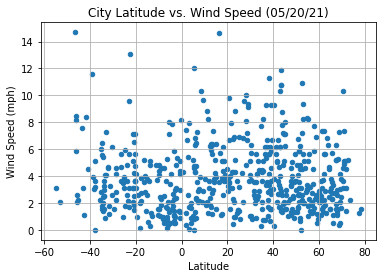

In [27]:
latWindPlot = clean_city_data.plot(kind='scatter', x= 'Lat', y = 'Wind Speed', title = 'City Latitude vs. Wind Speed (05/20/21)', xlabel = 'Latitude', ylabel = "Wind Speed (mph)", grid = 1 );


Code is plotting windiness at latitudes. Wind speed appears ot be independent of latitude

## Linear Regression

In [4]:
nHemi_df = clean_city_data.copy()

for index, row in nHemi_df.iterrows():
    if row['Lat']< 0:
        nHemi_df.drop(index = index, inplace=True)

nHemi_df.head()



,City Id,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,3628473,San Cristobal,7.7669,-72.2250,300.25,47,26,3.05,1653079425
3,3424607,Tasiilaq,65.6145,-37.6368,276.24,73,17,2.27,1653079282
4,162627,Yabrūd,33.9674,36.6574,289.31,36,0,2.87,1653079426
6,2514651,Los Llanos de Aridane,28.6585,-17.9182,292.01,91,75,7.20,1653079427
7,187585,Marsabit,2.3284,37.9899,292.53,67,93,6.70,1653079427


In [5]:
sHemi_df = clean_city_data.copy()
for index, row in sHemi_df.iterrows():
    if row['Lat']> 0:
        sHemi_df.drop(index = index, inplace=True)

sHemi_df.head()

,City Id,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,3652764,Puerto Ayora,-0.7393,-90.3518,300.13,91,53,0.89,1653079425
2,2181625,Te Anau,-45.4167,167.7167,278.98,88,100,2.26,1653079426
5,3833367,Ushuaia,-54.8000,-68.3000,280.96,61,20,3.09,1653079426
8,3939168,Huarmey,-10.0681,-78.1522,294.06,79,22,4.86,1653079428
11,1632694,Pangkalanbuun,-2.6833,111.6167,296.35,98,100,0.48,1653079429


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

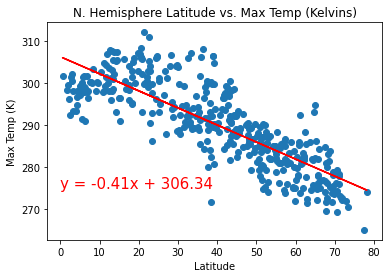

The regression line equation is: y = -0.41x + 306.34
The r-value is: -0.8191087173027433


In [17]:
x_values = nHemi_df['Lat']
y_values = nHemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,275),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (K)')
plt.title('N. Hemisphere Latitude vs. Max Temp (Kelvins)')
plt.show()
print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

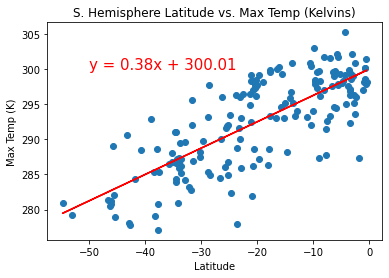

The regression line equation is: y = 0.38x + 300.01
The r-value is: 0.7718045244494982


In [14]:
x_values = sHemi_df['Lat']
y_values = sHemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (K)')
plt.title('S. Hemisphere Latitude vs. Max Temp (Kelvins)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

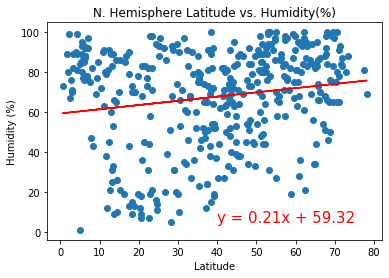

The regression line equation is: y = 0.21x + 59.32
The r-value is: 0.17296721000071033


In [19]:
x_values = nHemi_df['Lat']
y_values = nHemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('N. Hemisphere Latitude vs. Humidity(%)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

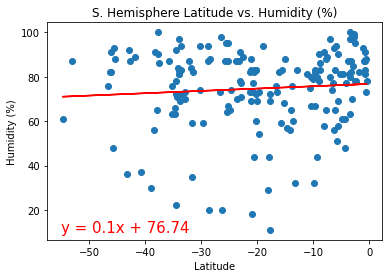

The regression line equation is: y = 0.1x + 76.74
The r-value is: 0.07975636521562127


In [25]:
x_values = sHemi_df['Lat']
y_values = sHemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('S. Hemisphere Latitude vs. Humidity (%)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

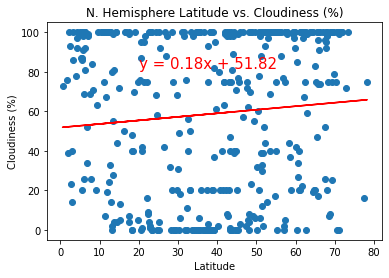

The regression line equation is: y = 0.18x + 51.82
The r-value is: 0.09059823621614838


In [30]:
x_values = nHemi_df['Lat']
y_values = nHemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,81.7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('N. Hemisphere Latitude vs. Cloudiness (%)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

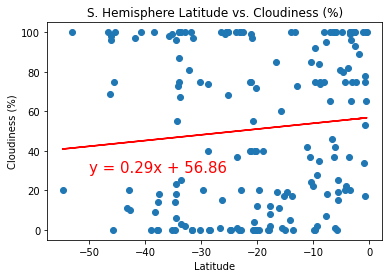

The regression line equation is: y = 0.29x + 56.86
The r-value is: 0.09930540495646348


In [33]:
x_values = sHemi_df['Lat']
y_values = sHemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,29),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('S. Hemisphere Latitude vs. Cloudiness (%)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

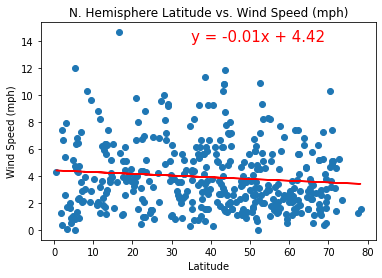

The regression line equation is: y = -0.01x + 4.42
The r-value is: -0.10269224419302816


In [10]:
x_values = nHemi_df['Lat']
y_values = nHemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('N. Hemisphere Latitude vs. Wind Speed (mph)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

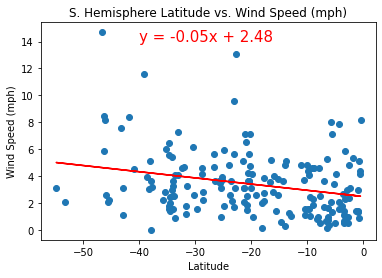

The regression line equation is: y = -0.05x + 2.48
The r-value is: -0.2634280013407379


In [11]:
x_values = sHemi_df['Lat']
y_values = sHemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('S. Hemisphere Latitude vs. Wind Speed (mph)')
plt.show()

print(f"The regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")